In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score




In [ ]:
from google.colab import files
uploaded=files.upload()

Saving yield_df.csv to yield_df.csv


In [ ]:
df=pd.read_csv('yield_df.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
features = df.drop(columns = ["hg/ha_yield"])
target = df["hg/ha_yield"]

features.head()

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,1485.0,121.0,16.37


In [ ]:
df["Item"].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Wheat', 'Sorghum', 'Soybeans',
       'Cassava', 'Yams', 'Sweet potatoes', 'Plantains and others'],
      dtype=object)

In [ ]:
features["Item"] = features["Item"].str.replace(", paddy", "Paddy", regex = False)
features["Item"].unique()

array(['Maize', 'Potatoes', 'RicePaddy', 'Wheat', 'Sorghum', 'Soybeans',
       'Cassava', 'Yams', 'Sweet potatoes', 'Plantains and others'],
      dtype=object)

In [ ]:
features["Item"] = features["Item"].str.replace(" and others", "", regex = False)
features["Item"].unique()

array(['Maize', 'Potatoes', 'RicePaddy', 'Wheat', 'Sorghum', 'Soybeans',
       'Cassava', 'Yams', 'Sweet potatoes', 'Plantains'], dtype=object)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

model =  make_pipeline(
    OneHotEncoder(),
    Ridge()
)

In [ ]:
model.fit(features, target)

Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

In [ ]:
predictions = model.predict(features)
predictions = pd.Series(predictions)
predictions.head()

0     24518.877053
1    118434.338629
2     21739.923237
3      6551.377690
4     -1582.171057
dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean Absolute Error:", mae(target, predictions))

Mean Absolute Error: 14545.595753290456


In [ ]:
avg = target.agg(np.mean)
avg

77053.33209404434

In [ ]:
baseline_predictions = [avg] * len(target)
len(baseline_predictions)

28242

In [ ]:
result=mae(target, baseline_predictions)
result

64242.06802597714

In [ ]:
import matplotlib.pyplot as plt

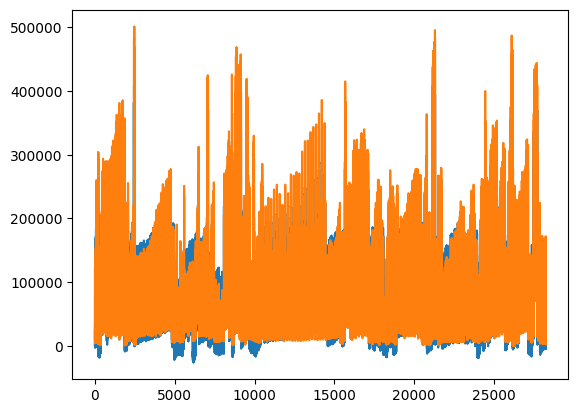

In [ ]:
plt.plot(predictions)
plt.plot(target)

plt.show()

In [ ]:
features.head()

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,1485.0,121.0,16.37


In [ ]:
target.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64